# AST4930 Homework Assignment #6 (20 pts + 5 pts)

### Instruction:

In this homework, we will use DBSCAN to cluster stars in the Orion complex, inspired by this work: Chen et al. (2020), https://ui.adsabs.harvard.edu/abs/2020A%26A...643A.114C/abstract In that paper, the authors used Shared Nearest Neighbor (SNN), which we did not cover during this course. We will use DBSCAN instead and compare the results. We will use the same Gaia data set which the authors made publicly available on this Github repository: https://github.com/BoquanErwinChen/GaiaDR2_Orion_Dissection I put the data file in the HiPerGator class share folder.

Below you will find instruction to this homework assignment.

1. I learned that when I download your .ipynb file from Canvas, it automatically adds your name to the file name. So you don't have to put your last name manually.

2. As you will see, the Notebook is partially filled. Fill in the empty cells. 

3. Note that there are questions you will have to answer. They will start with "Q: ..." The answers will be graded so make sure you answer all the questions.

4. It's fine you work on somewhere else than HiPerGator. But when I grade your homework, I will run your Jupyter Notebook on HiPerGator. So before you submit your homework, make sure you test it on HiPerGator and see if you get any error messages. For this particular homework assignment, we are concerned about the computing time so I'd like you all to use the HiPerGator resources for a fair comparison. 

5. It's fine if you use someone else's code you found on Internet, but make sure you write down the source. You don't have to cite me when you use anything from AST4930 Notebook. But as we learned from Homework Assignment #2, I do make mistakes. So please double-check before you copy and paste my script!

6. It's a common sense but just to make sure... when you make a figure, make sure they are readable/understandable. If you cannot see the title, labels, data points, or if you don't understand the point of the figure, I won't probably be able to see/understand them either!

6. Submit your final .ipynb file via Canvas before the due date.

### Let's read in the Gaia data.

In [1]:
import pandas as pd

filename = "Orion_data_20190924.csv"
df = pd.read_csv(filename)
df.dropna(subset=['ra', 'dec', 'parallax', 'pmra', 'pmdec'])
df = df.reset_index(drop=True)

In [2]:
df

,ra,ra_error,dec,dec_error,source_id,parallax,parallax_error,pmra,pmra_error,pmdec,...,phot_rp_mean_mag,bp_rp,radial_velocity,radial_velocity_error,teff_val,a_g_val,e_bp_min_rp_val,radius_val,lum_val,ruwe
0,75.254413,0.191960,-3.397018,0.139120,3213149215497176960,2.794918,0.212409,-2.617536,0.408962,1.669195,...,17.211597,2.672356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.909273
1,75.561670,0.234429,-4.866204,0.206860,3212376190103379584,3.165823,0.280067,-2.495638,0.511235,0.305570,...,17.622894,2.886185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.033360
2,75.052364,0.067621,-3.386506,0.052373,3213160421067816320,2.819880,0.073171,3.840388,0.135597,0.344070,...,15.534090,2.050842,NaN,NaN,3860.6667,0.2240,0.1140,NaN,NaN,1.001610
3,75.021177,0.103251,-4.005701,0.078453,3212679487809861248,2.669342,0.123817,0.160382,0.229156,-0.794245,...,15.949252,3.309411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.957134
4,75.179643,0.030784,-6.085392,0.026767,3211380620978873344,3.635541,0.038434,-1.479837,0.063476,-1.582998,...,9.450638,0.358518,NaN,NaN,8049.0000,0.5495,0.3030,NaN,NaN,1.243121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29025,89.445830,0.194402,6.615502,0.185320,3321921839250935424,2.963123,0.234839,3.694528,0.367675,-2.861006,...,16.974401,2.873224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.022000
29026,89.129035,0.025935,6.574493,0.026383,3322578251987928576,2.348265,0.031663,-2.595891,0.048980,-1.927499,...,13.123673,1.322178,NaN,NaN,4863.4053,0.8170,0.4082,0.937234,0.442744,1.047600
29027,89.368736,0.152991,6.784836,0.146842,3322675691910202368,4.136481,0.186160,-3.831424,0.303003,-2.835496,...,16.644974,2.890482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.997614
29028,89.196556,0.030407,6.698468,0.028375,3322676074163325952,2.695094,0.032618,-3.342518,0.061107,-3.943541,...,14.011317,1.566079,NaN,NaN,4465.4100,0.6405,0.3232,0.659014,0.155571,1.015678


### Spatial distribution on the sky

Text(0, 0.5, 'Dec (deg)')

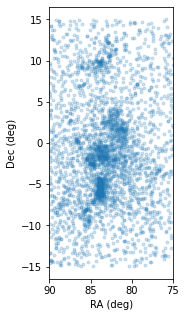

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5,5))

ax.plot(df.ra[::10], df.dec[::10], '.', alpha=0.2)
ax.set_xlim(90,75)
ax.set_aspect('equal')
ax.set_xlabel('RA (deg)')
ax.set_ylabel('Dec (deg)')


### Proper motions

Text(0, 0.5, 'PMDec (mas/yr)')

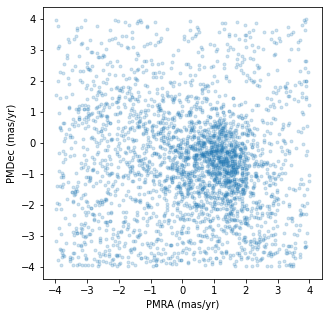

In [4]:
fig, ax = plt.subplots(figsize=(5,5))

ax.plot(df.pmra[::10], df.pmdec[::10], '.', alpha=0.2)
ax.set_xlabel('PMRA (mas/yr)')
ax.set_ylabel('PMDec (mas/yr)')


### CMD

Text(0, 0.5, 'g (mag)')

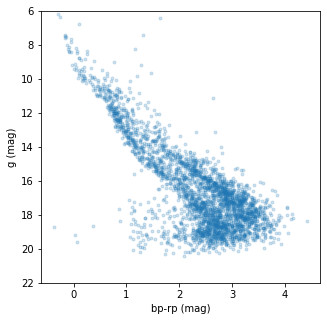

In [5]:
fig, ax = plt.subplots(figsize=(5,5))

ax.plot((df.phot_bp_mean_mag - df.phot_rp_mean_mag)[::10], df.phot_g_mean_mag[::10], '.', alpha=0.2)
ax.set_ylim(22,6)
ax.set_xlabel('bp-rp (mag)')
ax.set_ylabel('g (mag)')

### We will use RA, Dec, parallal, proper motions (RA & Dec)

In [6]:
X = df[['ra','dec','parallax','pmra','pmdec']]

In [7]:
X

,ra,dec,parallax,pmra,pmdec
0,75.254413,-3.397018,2.794918,-2.617536,1.669195
1,75.561670,-4.866204,3.165823,-2.495638,0.305570
2,75.052364,-3.386506,2.819880,3.840388,0.344070
3,75.021177,-4.005701,2.669342,0.160382,-0.794245
4,75.179643,-6.085392,3.635541,-1.479837,-1.582998
...,...,...,...,...,...
29025,89.445830,6.615502,2.963123,3.694528,-2.861006
29026,89.129035,6.574493,2.348265,-2.595891,-1.927499
29027,89.368736,6.784836,4.136481,-3.831424,-2.835496
29028,89.196556,6.698468,2.695094,-3.342518,-3.943541


### Q: Does DBSCAN need feature scaling? Why?

### TODO: If you think we need feature scaling, standardize the data. Otherwise, move on to the next step.

### TODO: hyperparameter optimization.

For DBSCAN, there are two hyperparameters to optimize: epsilon & min_samples. We should explore a grid of models to optimize the hyperparameters, but for the sake of computing time let's fix min_samples = 10 and try to find a "good" epsilon value. To do so, let's adopt what has been done in Castro-Ginard et al. (2018; https://ui.adsabs.harvard.edu/abs/2018A%26A...618A..59C/abstract). See also week 12 lecture note.

To briefly summarize, we generate a random sample having the same number of stars to our dataset, where the features are drawn "randomly". The idea is that, if the stars are all "field stars", not cluster stars, then the distribution would be following Gaussian distribution.

### Here's where I generate the new random sample.

In [14]:
import numpy as np

X_new = np.zeros_like(X)

# I draw 29,030 RA values using the mean and standard deviation of the dataset. 
X_new[:,0] = np.random.normal(df.ra.mean(), df.ra.std(), X.shape[0])
# Same for Dec, parallax, PMRA, PMDec.
X_new[:,1] = np.random.normal(df.dec.mean(), df.dec.std(), X.shape[0])
X_new[:,2] = np.random.normal(df.parallax.mean(), df.parallax.std(), X.shape[0])
X_new[:,3] = np.random.normal(df.pmra.mean(), df.pmra.std(), X.shape[0])
X_new[:,4] = np.random.normal(df.pmdec.mean(), df.pmdec.std(), X.shape[0])

### TODO: If you think we need feature scaling for this new data set, standardize the data. Otherwise, move on to the next step.

### TODO: For the original data set, compute the distance to the 10th nearest neighbor.

Hint: Refer to week 10 notebook.

### TODO: For the random data set, compute the distance to the 10th nearest neighbor.

Hint: Refer to week 10 notebook.

### TODO: Make a histogram showing the 10th nearest neighbor distance for the original data set and for the random data set. The idea is to make a similar plot to Figure 3 of Castro-Ginard et al. (2018).

You can use the script below. You should see something similar to what I have.

Text(0.5, 0, '10th nearest neighbor distance')

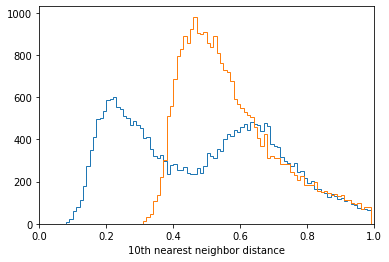

In [18]:
plt.hist(distances, bins=np.arange(0,1,0.01), histtype='step')
plt.hist(distances_new, bins=np.arange(0,1,0.01), histtype='step')

plt.xlim(0,1)
plt.xlabel('10th nearest neighbor distance')

### Q: What do you think is the reasonable epsilon value based on the above histogram and why?

### Let's be conservative and choose eplison=0.15

### TODO: Make a DBSCAN model using epsilon=0.15 & min_samples=10.

### Q: How many clusters did you find?

### Q: How many members do each clusters have?

### TODO: Make a figure showing the distribution of identified clusters. The idea is to make a plot similar to Figure 2 of Chen et al. (2020; https://ui.adsabs.harvard.edu/abs/2020A%26A...643A.114C/abstract). Feel free to use the script below as needed.

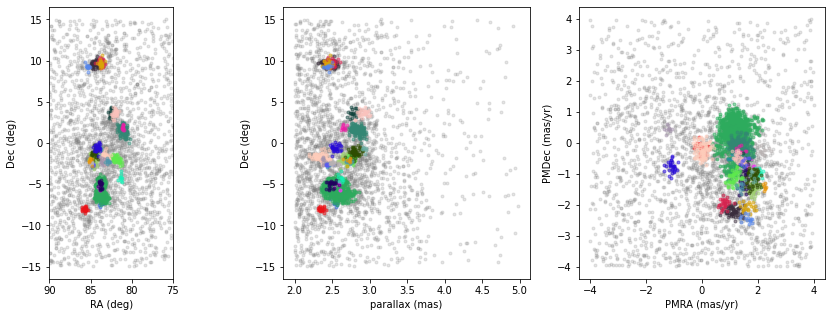

In [60]:
import random

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,5))

ax1.plot(df.ra[::10], df.dec[::10], '.', color='gray', alpha=0.2)
ax1.set_xlim(90,75)
ax1.set_aspect('equal')
ax1.set_xlabel('RA (deg)')
ax1.set_ylabel('Dec (deg)')

ax2.plot(df.parallax[::10], df.dec[::10], '.', color='gray', alpha=0.2)
ax2.set_xlabel('parallax (mas)')
ax2.set_ylabel('Dec (deg)')


ax3.plot(df.pmra[::10], df.pmdec[::10], '.', color='gray', alpha=0.2)
ax3.set_xlabel('PMRA (mas/yr)')
ax3.set_ylabel('PMDec (mas/yr)')


n_colors = np.unique(model.labels_).shape[0]-1

color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(n_colors)]

for n in np.arange(np.unique(model.labels_).shape[0]-1):
    ax1.plot(df.ra[model.labels_ == n], df.dec[model.labels_ == n], '.', alpha=0.5, c=color[n])
    ax2.plot(df.parallax[model.labels_ == n], df.dec[model.labels_ == n], '.', alpha=0.5, c=color[n])
    ax3.plot(df.pmra[model.labels_ == n], df.pmdec[model.labels_ == n], '.', alpha=0.5, c=color[n])


### Q: How do the clusters you identified compare with the ones identified in Chen et al. (2020)?

### Below is optional if you'd like to get some extra credits (max 5 points).

### TODO: Make two additional DBSCAN models adopting epsilon = 0.12, 0.2. Repeat the above procedure and identify clusters.

### Q: How many clusters did you find with the new epsilon values, and how many stars are there in each clusters? How do these numbers compare with the model adopting epsilon=0.15?

### Q: What do you think of unsupervised learning? What are some of the issues?